# Oh sorry, das war ein Falsch-Positiv

## Klassifizierungsmetriken
Um zu verstehen, wie wir die Performanz eines Klassifikators messen können, werden wir zunächst ein einfaches Zwei-Klassen-Problem betrachten und analysieren, wie es richtig oder falsch klassifiziert werden kann. Auf Grundlage dessen werden wir später in der Lage sein, weitere, spezifischere Metriken abzuleiten.

Die Wahl der Metriken, die Sie für die Bewertung Ihrer maschinellen Lernalgorithmen verwenden, ist sehr wichtig, da sie beeinflusst, wie die Performanz gemessen und verglichen wird. Die ausgewählten Metriken beeinflussen somit, wie Sie die Wichtigkeit verschiedener Merkmale in den Ergebnissen gewichten und welchen Algorithmus Sie schlussendlich wählen. In diesem Abschnitt werden Sie erfahren, wie Sie in Python verschiedene Performanzmetriken des maschinellen Lernens mit scikit-learn auswählen und verwenden können.

Das ist wichtig, da Sie so in der Lage sind, Unterschiede zu erkennen und eine Auswahl zu treffen:
- Unterschiedliche Transformationen der Daten, die zum Trainieren desselben maschinellen Lernmodells verwendet werden.
- Unterschiedliche maschinelle Lernmodelle, die auf denselben Daten trainiert wurden.
- Unterschiedliche Konfigurationen von maschinellen Lernmodellen, die auf denselben Daten trainiert wurde.  

https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


### Wahrheitsmatrix  (engl. Confusion Matrix)

![FalsePositive-300x225.png](images/FalsePositive-300x225.png)


Eine reale Bedingung kann entweder "der Fall" (positiv) oder "nicht der Fall" (negativ) sein. Unabhängig von den realen Bedingungen kann ein Klassifikator diese Bedingung basierend auf den Daten ebenfalls entweder als "der Fall" oder "nicht der Fall" klassifizieren. Daraus ergeben sich vier verschiedene Klassifikationsmöglichkeiten, die durch die Wahrheitsmatrix dargestellt werden.


Zur Veranschaulichung wollen wir das Beispiel einer medizinischen Diagnose einer Herzerkrankung betrachten. Stellen Sie sich vor, wir verfügen über bereits vorhandene medizinische Daten sowie klinische Messungen und möchten ein maschinelles Lernverfahren auf diese anwenden, um vorherzusagen, ob jemand eine Herzerkrankung entwickeln wird. Wie entscheiden wir, welches Modell am besten mit unseren Daten funktioniert?

Die beiden Spalten in dieser Wahrheitsmatrix entsprechen dem, was der maschinelle Lernalgorithmus vorhergesagt hat, und die Zeilen entsprechen der Grundwahrheit.
In diesem speziellen Fall handelt es sich um ein binäres Klassifikationsproblem, da nur zwei Kategorien zur Auswahl stehen: _Herzkrankheit_ oder _hat keine Herzkrankheit._ Wahrheitsmatrizen können auch für mehr als zwei Kategorien verwendet werden.

Jedes Mal, wenn ein neuer Patient klassifiziert wird, wird die Wahrheitsmatrix aktualisiert und ein weiteres Klassifizierungsergebnis wird zu einem der vier Felder hinzugefügt. Wir werden diese Felder verwenden, um die Häufigkeit jedes Klassifikationsergebnisses zu zählen.

![confusion_matrix.png](images/confusion_matrix.png)



Die obere linke Ecke enthält <font color=darkgreen>__richtig Positive__</font> (engl. true positives), das sind Patienten, die eine Herzerkrankung hatten und vom Algorithmus korrekt identifiziert wurden.  
Die rechte untere Ecke enthält <font color=darkgreen>__richtig Negative__</font> (engl. true negatives), dies sind Patienten, die keine Herzerkrankung hatten und vom Algorithmus korrekt identifiziert wurden.  
Die untere linke Ecke enthält <font color=darkred>__falsch Negative__</font> (engl. false negatives), dies sind Patienten, die eine Herzerkrankung haben, der Algorithmus dies aber nicht erkannte.  
Die rechte obere Ecke enthält schließlich <font color=darkred>__falsch Positive__</font> (engl. false positives), das sind Patienten, die keine Herzkrankheit haben, der Algorithmus dies aber dennoch behauptet.

Diese Gedächtnisstütze könnte nützlich sein: Das erste Wort gibt an, ob die Vermutung richtig war oder nicht. Das zweite Wort gibt an, wie die Vorhersage lautete.

Wir wollen so viele richtig-positive und so viele richtig-negative Vorhersagen wie möglich haben, während wir gleichzeitig so wenig falsch-negative und falsch-positive Vorhersagen wie möglich anstreben. Das ist eine Gratwanderung, denn wenn man den Klassifikator empfindlicher für Herzerkrankungen macht, führt das unweigerlich zu mehr falsch-positiven Vorhersagen, bei denen der Klassifikator eine Herzerkrankung "erkennt", wo eigentlich gar keine ist.



Der Falsch-Positiv-Anteil/Fall-Out ist definiert als: 

$ \frac{\sum \textrm{FP}}{\sum \textrm{FP+TN}} = 1 - \frac{\sum \textrm{TN}}{\sum \textrm{FP+TN}} $

Die zweite Möglichkeit, die auf der Spezifität basiert, ist für mehr als zwei Klassen oder Dimensionen der Matrix einfacher zu berechnen.


Der _richtig-positiv-Anteil_ und der _falsch-positiv-Anteil_ sind Konzepte, die eng mit der ROC verwandt sind. Mehr dazu später.

Nachdem das Modell gelernt hat, Herzkrankheiten zu klassifizieren, testen wir es mit einem Datensatz mit echten Patientendaten. Die Diagnosen werden im Datensatzes als eine Liste von 0en (keine Herzerkrankung) und 1en (Herzerkrankung) dargestellt. Das bedeutet zum Beispiel, dass die ersten 5 Patienten in diesem Datensatz tatsächlich keine Herzerkrankung hatten, während die letzten 5 Patienten eine hatten.

$$ground\_truth \ \ = \ \ \ [0,0,0,0,0,1,1,1,1,1]$$


Wenn wir den Datensatz in das Modell einspeisen, erhalten wir diese Diagnosevorhersagen:

$$Vorhersage \ \ \ \ \ \ = \ \ \ [0,1,1,0,0,1,0,1,1,1]$$


<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 2.3.1:</b> Füllen Sie die folgende Wahrheitsmatrix aus, ersetzen Sie a, b, c und d durch die entsprechenden Anzahlen. Sie müssen dazu den Code der Markdown-Zelle bearbeiten. 
</div>


<table class="tg table-condensed table-bordered">
  <tr>
    <th class="tg-c3ow" colspan="2" rowspan="2"></th>
    <th class="tg-7btt" colspan="2">Wahrer Zustand (Realität)</th>
  </tr>
  <tr>
    <td class="tg-c3ow">Herzerkrankung</td>
    <td class="tg-c3ow">Keine Herzerkrankung</td>
  </tr>
  <tr>
      <td class="tg-7btt" rowspan="2"><b>Vorhergesagte Erkrankung</b></td>
    <td class="tg-c3ow">Herzerkrankung</td>
    <td class="tg-c3ow">4</td>
    <td class="tg-c3ow">2</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Keine Herzerkrankung</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">3</td>
  </tr>
</table>


<div class="alert alert-block alert-success">

<b>Ihre Antwort:</b></div>
























<div class="alert alert-block alert-success">
<b>Aufgabe/Fragestellung 2.3.2:</b> Nun wollen wir das Gleiche wie zuvor tun. Statt eines binären Klassifikationsproblem liegt diesmal ein Problem mit 3 verschiedenen Labels vor: Katze(Cat), Hund(Dog) und Affe(Mon). Füllen Sie die Tabelle aus.
</div>

$$actual =    
[Dog, Mon, Mon, Mon, Cat]$$
$$predicted =  
[Cat, Dog, Mon, Mon, Mon]$$ 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg table-condensed table-bordered">
  <tr>
    <th class="tg-c3ow" colspan="2" rowspan="2"></th>
    <th class="tg-7btt" colspan="3">Wahrer Zustand (Realität)</th>
  </tr>
  <tr>
    <td class="tg-c3ow">Tatsächliche Katze</td>
    <td class="tg-c3ow">Tatsächlicher Hund</td>
    <td class="tg-baqh">Tatsächlicher Affe</td>
  </tr>
  <tr>
    <td class="tg-7btt" rowspan="3">Vorhergesagte Bedingung</td>
    <td class="tg-c3ow">Vorhergesagte Katze</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Vorhergesagter Hund</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">Vorhergesagter Affe</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">2</td>
  </tr>
</table>


<div class="alert alert-block alert-success">

<b>Ihre Antwort:</b></div>










































<div class="alert alert-block alert-success">
<b>Aufgabe 2.3.3:</b> 
Bestätigen Sie Ihr Ergebnis mit der Confusion-Matrix Funktion von scikitlearn. Werfen Sie einen Blick in die <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">Dokumentation</a> und wenden Sie diese Funktion auf die Daten der Übung 2.2.1.a an. Der Code sollte eine Matrix in der gleichen Form wie in der Tabelle oben ausgeben. Dazu ist am Ende ein kleiner zusätzlicher Schritt notwendig, den Sie selbst herausfinden sollen.
</div>

In [63]:
from sklearn.metrics import confusion_matrix
#STUDENT CODE HERE
# Cross Validation Regression MAE
from pandas import read_csv
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

ground_truth =[0,0,0,0,0,1,1,1,1,1]
Vorhersage  = [0,1,1,0,0,1,0,1,1,1]
confusion_matrix(ground_truth,Vorhersage)

array([[3, 2],
       [1, 4]], dtype=int64)

<div class="alert alert-block alert-success">
<b>Aufgabe 2.3.4:</b> Bestätigen Sie auch Ihre Ergebnisse zu Übung 2.2.1.b. (zweite Tabelle Katze, Hund, Affe)
</div>

In [64]:
#STUDENT CODE HERE
actual =["Dog", "Mon", "Mon", "Mon", "Cat"]
predicted =  ["Cat", "Dog", "Mon", "Mon", "Mon"]

confusion_matrix(actual,predicted,labels=["Dog","Cat","Mon"])
#STUDENT CODE until HERE

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

<div class="alert alert-block alert-success">
<b>Aufgabe 2.3.5:</b> Berechnen Sie die Confusion-Matrix für den pima-indians-diabetes-Datensatz mit train_test_split, Testgröße 0,33, Seed 7 und logistischer Regression.
Beachten Sie, dass die letzten Spalte des Datensatzes angibt, ob die Person Diabetes hat oder nicht.  
1: positiv auf Diabetes getestet,  
0: negativ auf Diabetes getestet
<ul>
<li>Hinweis: Sie können das LogisticRegression Modell verwenden, indem Sie die Methoden fit und predict verwenden. Schauen Sie sich dazu auch die Dokumentationen von sklearn an.
</ul>
</div>

In [65]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

#STUDENT CODE HERE
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=7)

model=LogisticRegression(max_iter=50000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

conf=confusion_matrix(y_test,y_pred)
print("confusion_matrix")
print(conf)
#STUDENT CODE until HERE

print("Number of people with diabetes: ", conf[0,0]+conf[1,0])
print("Number of people without diabetes: ", conf[1,0]+conf[1,1])


print("True positives: ",conf[0,0])
print("True negatives: ",conf[1,1]) 
print("False positives: ",conf[0,1])
print("False negatives: ",conf[1,0])


confusion_matrix
[[142  20]
 [ 34  58]]
Number of people with diabetes:  176
Number of people without diabetes:  92
True positives:  142
True negatives:  58
False positives:  20
False negatives:  34


### Korrektklassifikationsrate (engl. accuracy)
Ein einfacher Metrik, um einen Satz von Vorhersagen zu einem Klassifizierungsproblem zu bewerten, ist die Korrektklassifikationsrate.
Siet ist das Verhältnis zwischen der Anzahl der richtigen Vorhersagen und der Anzahl aller getroffenen Vorhersagen. Normalerweise wird die Korrektklassifikationsrate als Prozentsatz zwischen 0 % für die schlechtestmögliche Genauigkeit und 100 % für die bestmögliche Genauigkeit angegeben.


$$ \textrm{Korrektklassifikationsrate} = \frac{\textrm{richtige Vorhersagen}}{\textrm{alle Vorhersagen}} = \frac{ \color{darkgreen}{\textrm{TP} + \textrm{TN}}}{\color{darkgreen}{\textrm{TP} + \textrm{TN}} +\color{darkred}{\textrm{FP} + \textrm{FN}}}$$

Angenommen, wir haben einen Datensatz mit Herzkrankheitsfällen von Erwachsenen mittleren Alters. 10 % der Personen in diesem Datensatz haben eine Herzerkrankung, während 90 % keine haben. Nun trainieren wir einen sehr einfachen Klassifikator auf diesem Datensatz. Es stellt sich heraus, dass der Klassifikator eine genial einfache, aber dennoch genaue Strategie entwickelt hat: Er ignoriert die Daten, die Sie ihm geben, komplett und sagt einfach immer "keine Herzerkrankung" voraus.  

<div class="alert alert-block alert-success">
<b>Frage 2.3.6:</b> Welche Korrektklassifikationsrate hat dieser Klassifikator auf diesem Datensatz?
</div>

<div class="alert block alert-success">

<b>Ihre Antwort:</b>0.9</div>


<div class="alert alert-block alert-success">
<b>Frage 2.3.7:</b> Beschreiben Sie, wie der Datensatz aussehen muss, damit die Korrektklassifikationsrate eine potenziell nützliche Metrik ist? (Eine vage Beschreibung ist ausreichend)
</div>

<div class="alert block alert-success">

<b>Ihre Antwort:</b>Die Klassen müssen ausgeglichen sein</div>


<div class="alert block alert-success">
<b>Aufgabe 2.3.8:</b> Implementieren Sie eine Funktion, die die Korrektklassifikationsrate  berechnet. Mit Ihrem bisherigen Kenntnisstand sollte Ihnen das leicht fallen.
</div>

In [66]:
# Example of calculating classification accuracy
# Calculate accuracy percentage between two lists
#STUDENT CODE HERE

def accuracy_metric(true,predicted):
    confusion_matrix(true,predicted)
    correct=(conf[0,0]+conf[1,1])/(conf[0,0]+conf[1,1]+conf[0,1]+conf[1,0])
    return correct
#STUDENT CODE until HERE


# Test accuracy
true = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
accuracy = accuracy_metric(true, predicted)
print(accuracy)

0.7874015748031497


<div class="alert alert-block alert-success">
<b>Aufgabe 2.3.9:</b> Nun wollen wir die Korrektklassifikationsrate berechnen, aber mit Funktionen der Bibliothek sklearn und einem Datensatz. Parameter der Aufgabe sind:
<ul>
<li>Datensatz: pima-indians-diabetes
<li> Resampling-Methode: k-fold, 10 Faltungen.
<li> Modell: Logistische Regression, Solver: liblinear.
<li> Hinweis: Die beiden folgenden Links könnten hilfreich sein:
<UL>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html</a>,
     <li><a href="https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values">https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values</a>
</ul>
</div>

<div class="alert alert-block alert-info">

<b>Hinweis:</b> Alle Scores werden so ausgegeben, dass sie in aufsteigender Reihenfolge sortiert werden können (der größte Score ist der beste).  
Einige Bewertungsmetriken (wie der mittlere quadratische Fehler oder der logarithmische Verlust) sind von Natur aus absteigende Scores (der kleinste Score ist der beste) und werden als solche von der Funktion cross validation.cross val score() negativ ausgegeben.  
Das ist wichtig zu beachten, da einige Scores so negativ werden, die per Definition niemals negativ sein können.
</div>

In [67]:
from pandas import read_csv
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#STUDENT CODE HERE
filename="data/pima-indians-diabetes.data.csv"
names=["Pregs","Glukose","bloodpressure","Trizeps","Insulin","BMI","Func","Age","class"]
df=read_csv(filename,names=names)
z,s=df.shape
X=df[names[0:8]].values
Y=df["class"].values

model=LogisticRegression(solver="liblinear")
kf=StratifiedKFold(n_splits=10)
cross_val_score(model,X,Y,cv=kf,scoring="accuracy")

#STUDENT CODE until HERE

array([0.74025974, 0.75324675, 0.79220779, 0.72727273, 0.74025974,
       0.74025974, 0.81818182, 0.79220779, 0.73684211, 0.82894737])

### Positiver Vorhersagewert, Sensitivität  (engl. precision, recall)

Der __positive Vorhersagewert__ (engl. precision) kann als ein Maß dafür gesehen werden, wie sehr Sie dem Klassifikator vertrauen können, wenn er "positiv" ausgibt. Wenn der Klassifikator einen deutlichen Hinweis benötigt, bevor er eine Herzerkrankung klassifiziert, gibt es eine geringe Anzahl von falsch-positiven Ergebnissen im Verhältnis zu den richtig-positiven Ergebnissen, was zu einem hohen positiven Vorhersagewert führt.

Wenn ein sehr präziser Klassifikator (mit einem hohen positiven Vorhersagewert) sagt, dass ein Patient eine Herzerkrankung hat, dann wird dies wahrscheinlich der Fall sein. Da der präzise Klassifikator jedoch einen starken Indikator benötigt, bleiben viele Patienten mit Herzerkrankungen unerkannt.

$$ \textrm{Positiver Vorhersagewert} = \frac{\textrm{richtig Positive}}{\textrm{vorhergesagte Positive}} = \frac{ \color{darkgreen}{\textrm{TP} }}{\color{darkgreen}{\textrm{TP}} +\color{darkred}{\textrm{FP}}}$$


__Sensitivität__ oder Recall beschreibt, wie gut der Klassifikator im Erkennen von Positiven ist. Wenn der Klassifikator sehr dünnhäutig ist und bereits auf winzige Unterschiede reagiert, wird er die meisten tatsächlichen Positiven in den Daten entdecken und nur sehr wenige falsch Negative übrig lassen. Wenn ein sehr empfindlicher Klassifikator sagt, dass ein Patient eine Herzerkrankung hat, kann es sehr gut sein, dass dies nicht der Fall ist. Ein empfindlicher Klassifikator wird jedoch bei fast allen Patienten, die tatsächlich eine Herzerkrankung haben, eine solche erkennen. 

$$ \textrm{Sensitivität} = \frac{\textrm{richtig Positive}}{\textrm{tatsächlich Positive}} = \frac{ \color{darkgreen}{\textrm{TP} }}{\color{darkgreen}{\textrm{TP}} +\color{darkred}{\textrm{FN}}}$$

Daraus lässt sich schließen, dass die Klassifizierung immer ein Balanceakt ist. 

<div class="alert alert-block alert-success">
<b>Frage 2.3.10:</b> Angenommen, ein Screening auf Herzkrankheiten soll für eine breite Population junger und scheinbar gesunder Menschen entwickelt werden, um unbekannte Fälle von Herzkrankheiten aufzudecken. Wäre ein guter Positiver Vorhersagewert oder eine gute Sensitivität wichtiger?
</div>

<div class="alert alert-block alert-success">

<b>Ihre Antwort:</b> Die Wskt eine Herzkrankreich zu haben ist gering, also ist wsl auch die Klassifikation schwer. Daher muss der Klassifikator sensitiv sein.
</div>

<div class="alert alert-block alert-success">
<b>Frage 2.3.11:</b> Es ist gegeben, dass von 100 Personen 2 Personen eine Herzerkrankung haben (positiv). Welcher Positive Vorhersagewert und welche Sensitivität würden sich aus einem Klassifikator ergeben, der immer "Herzkrankheit" ausgibt?
</div>

<div class="alert alert-block alert-success">

<b>Ihre Antwort:</b>2/100=0.02 für den positivien Vorhersagewert und 2/2=1 für die Sensitivität</div>



![metrics.jpg](images/metrics.jpg)

### Klassifikationsbericht (engl. Classification Report)

Die scikit-learn Bibliothek bietet im Umgang mit Klassifizierungsproblemen einen komfortablen Bericht, der Ihnen einen schnellen Überblick über die Genauigkeit eines Modells anhand einer Reihe von Maßen gibt.  
Die Funktion classification_report() berechnet für jede Klasse: 
- positiver Vorhersagewert (precision): $ \frac{\sum \textrm{richtig Positive}}{\sum \textrm{vorhergesagte Positive}} $ <br><br>
- Sensitivität (recall): $ \frac{\sum \textrm{richtig Positive}}{\sum \textrm{tatsächlich Positive}} $ <br><br>
- F1-Score: ist ein weiteres Maß für die Performanz eines Tests. Er berücksichtigt sowohl den Positiven Vorhersagewert als auch die Sensitivität des Tests. Der F1-Score erreicht seinen besten Wert bei 1 (perfekter Positiver Vorhersagewert und Sensitivität) und den schlechtesten bei 0. <br><br>  
- Support: Der Support zählt das Auftreten jeder Klasse in den gegebenen Daten. Im nächsten Beispiel wäre z.B. 162 richtig Positive(141) + falsch Negative(21) und 92 richtig Negative(51) + falsch Positive(41).

Das folgende Beispiel demonstriert den Bericht für ein binäres Klassifizierungsproblem.

In [68]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)

print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



<div class="alert alert-block alert-success">
<b>Frage 2.3.12:</b> Was können Sie über das Modell sagen? Ist es ein gutes Modell? Und warum?
</div>

<div class="alert block alert-success">

<b>Ihre Antwort:</b> Die Daten sind nicht ausgeglichen (support). Es gibt viel mehr gesunde als kranke Menschen im Datensatz. Die Maße sind alle recht hoch. Das Modell ist also gut. Die Sensitivität für die Klassifikation kranker Menschen ist aber deutlich schlechter als die gesunder.</div>



### Logarithmischer Verlust

Verlustfunktionen sind für Klassifikationsaufgaben genauso wichtig wie für die Regression. Obwohl die Wahrheitsmatrix (engl. Confusion Matrix) und die daraus abgeleiteten Metriken nützliche Informationen über die Performanz von Methoden des maschinellen Lernens liefern können, basieren sie auf diskreten Ereignissen und sind somit nicht kontinuierlich. Backpropagation-Algorithmen benötigen aber eine differenzierbare (und damit kontinuierliche) Funktion. 

Für Klassifizierungsprobleme können wir die gleichen Algorithmen wie für Regressionsprobleme verwenden, wenn wir ihnen dazu einen zu minimierenden Verlust geben. Bei der Klassifikation ist die am meisten verwendete Verlustfunktion der logarithmische Verlust (oder logloss). Er bewertet die Vorhersagen der Wahrscheinlichkeiten der Klassenzugehörigkeit.  
Die skalare Wahrscheinlichkeit zwischen 0 und 1 kann als ein Maß für das Vertrauen in eine Vorhersage eines Algorithmus verstanden werden. 
Ein kleinerer Logloss ist besser, wobei 0 einen perfekten Logloss darstellt.

Zusätzlich werden Vorhersagen, die nicht korrekt sind, in Abhängigkeit von der Sicherheit der Vorhersage bestraft. Wenn das Modell vorhersagt, dass das Eintreten einer Bedingung sehr unwahrscheinlich ist (vorhergesagte Wahrscheinlichkeit < 0,1), wird der Verlust sehr hoch, wenn die Bedingung tatsächlich eingetreten ist. (Siehe Abb. )


![Imagen K-fold](images/Log_loss_graph.png)

## Letzte Aufgabe:

In dieser Aufgabe haben Sie ein Klassifikationsproblem, bei dem Sie entscheiden sollen, welches Modell Sie verwenden wollen. Glücklicherweise hat bereits jemand Code geschrieben, der den bekannten Iris-Datensatz analysiert (https://en.wikipedia.org/wiki/Iris_flower_data_set). Die Analyse beinhaltet eine Datenvisualisierung und erstellt die folgenden sechs Modelle (auch hier gilt das "No Free Lunch Theorem"!)

- Logistische Regression
- Lineare Diskriminanzanalyse
- k-nearest Neighbors
- Entscheidungsbaum-Klassifikator
- Gaußsche Naive Bayes
- C-Support-Vektor-Klassifikation


<div class="alert alert-block alert-success">
<b>Aufgabe 2.3.13:</b> Führen Sie den Code aus und untersuchen Sie die Ausgabe
</div>

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width  class
0            5.1          3.5           1.4          0.2    0.0
1            4.9          3.0           1.4          0.2    0.0
2            4.7          3.2           1.3          0.2    0.0
3            4.6          3.1           1.5          0.2    0.0
4            5.0          3.6           1.4          0.2    0.0
5            5.4          3.9           1.7          0.4    0.0
6            4.6          3.4           1.4          0.3    0.0
7            5.0          3.4           1.5          0.2    0.0
8            4.4          2.9           1.4          0.2    0.0
9            4.9          3.1           1.5          0.1    0.0
10           5.4          3.7           1.5          0.2    0.0
11           4.8          3.4           1.6          0.2    0.0
12           4.8          3.0           1.4          0.1    0.0
13           4.3          3.0           1.1          0.1    0.0
14           5.8          4.0  

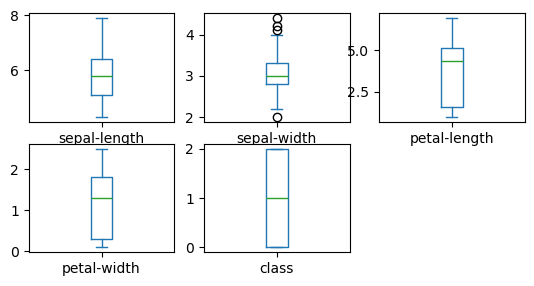

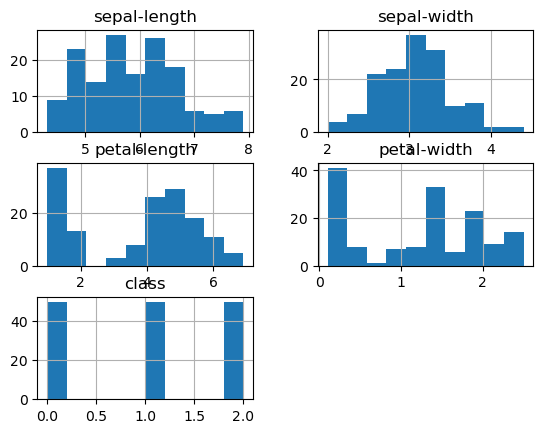

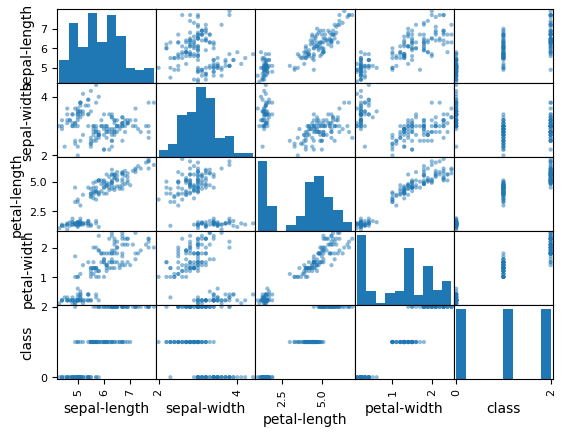

LR: 0.991667 (0.025000)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.038188)
SVM: 0.991667 (0.025000)


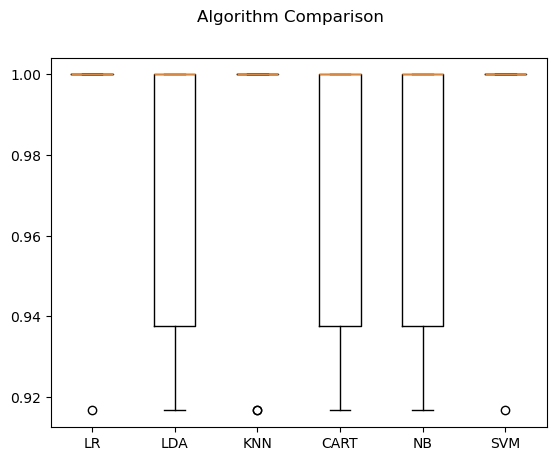

Model LR: Accuracy: 0.866667 
Model: LR
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Classification Report: LR
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

Model LDA: Accuracy: 0.966667 
Model: LDA
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
Classification Report: LDA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      0.92      0.96        12
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Model KNN: Accuracy: 0.900000

In [69]:
# Load libraries
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets

# Load dataset
filename = 'data/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= names)

# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed, shuffle=True)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs', max_iter=200))) #These parameters are set to prevent warnings.
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto'))) #Parameter set to prevent warnings.

# evaluate each model in turn and prints Accuracy
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg) # Prints accuracy

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

for name, model in models:
    model.fit(X_train, Y_train)
    predictions= model.predict(X_validation)
    print("Model %s: Accuracy: %f " % (name, accuracy_score(Y_validation, predictions)))
    print("Model: " + name)
    print(confusion_matrix(Y_validation, predictions))
    print("Classification Report: " + name)
    print(classification_report(Y_validation, predictions))

<div class="alert alert-block alert-success">
<b>Frage 2.3.14:</b> Welchen Algorithmus würden sie wählen? Erklären Sie Ihre Antwort! 
</div>

<div class="alert block alert-success">
<b>Ihre Antwort:</b> Im Boxplot wird die accuracy gezeigt. Hier weisen alle Algos den gleichen Wert von 1 beim Median auf. 3 der Algorithmen haben keine Streuung, dafür aber Ausreißer. Die anderen 3 Algos haben zwar eine größere Streuung, dafür aber keine Ausreißer.</div>














## Literatur
- https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b